# TP 8 Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



# Importation des librairies necessaires au travail

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import f1_score

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [3]:
# données
X = np.genfromtxt('X.csv', delimiter=',', dtype=float)
X.shape

(307, 2)

In [4]:
Y = np.genfromtxt('yval.csv', delimiter=',', dtype=float)[:, np.newaxis]
Y.shape

(307, 1)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données. 


# Entrainement 
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

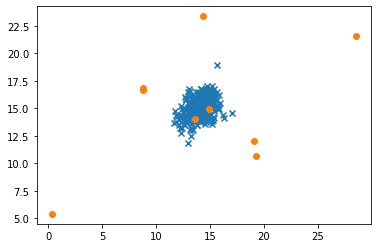

In [ ]:
plt.scatter(X0[:,0],X0[:,1], marker ='x')
plt.scatter(X1[:,0],X1[:,1], marker ='o')

Mettons un lien avec ce que nous avons appris en regression linéaire

In [6]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)

In [9]:
def calculProba(X,m,v):
    return (1 / (np.sqrt(2 * v * np.pi))) * np.exp(- np.power(X - m, 2) / (2 * v))
calculProba(X,m,v)

array([[2.16228566e-01, 2.99282037e-01],
       [2.57494463e-01, 1.95359578e-01],
       [2.94127751e-01, 2.46338092e-01],
       [2.47180418e-01, 2.03564553e-01],
       [2.72534330e-01, 2.33718327e-01],
       [2.91795287e-01, 1.45439696e-01],
       [1.87118467e-01, 2.55993023e-01],
       [1.51227848e-01, 2.41471021e-01],
       [9.35546075e-02, 1.99494072e-01],
       [1.66546476e-01, 3.04236648e-01],
       [2.93392047e-01, 9.03776349e-02],
       [2.94479979e-01, 2.87660583e-01],
       [2.55598758e-01, 2.77971868e-01],
       [2.56000881e-01, 2.71735670e-01],
       [2.93266961e-01, 1.28872329e-01],
       [2.94441344e-01, 2.80896196e-01],
       [2.92881597e-01, 2.99766071e-01],
       [2.85181255e-01, 3.04637799e-01],
       [2.77259552e-01, 2.49513837e-01],
       [9.48677566e-02, 1.02571311e-01],
       [2.70256903e-01, 2.80135423e-01],
       [2.93412340e-01, 3.01206584e-01],
       [2.41097684e-01, 1.55197103e-01],
       [2.93034466e-01, 2.97369048e-01],
       [1.961130

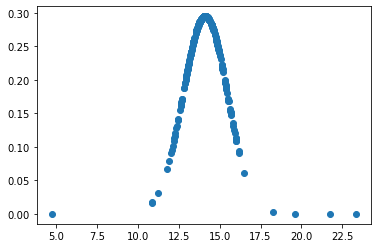

In [22]:
plt.scatter(X[:,0],prob[:,0])

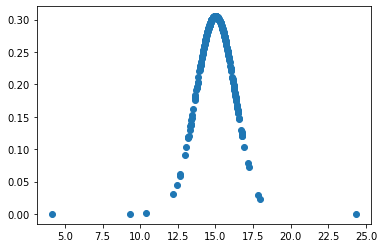

In [23]:
plt.scatter(X[:,1],prob[:,1])

# Gaussienne univariée

In [25]:
f1_scores = []
proba = calculProba(X, m, v)
yproba = proba[:,0]*proba[:,1]
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(Y, y_pred)))

In [26]:
epci = list(sorted(f1_scores, key=lambda x: x[1], reverse=True))[0]
epci

(0.0001, 0.8)

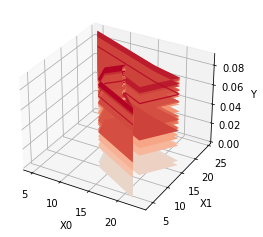

In [30]:
fig = plt.figure()
ax1 = plt.subplot(projection='3d')
ax1.plot_surface(X[:, 0], X[:, 1], np.reshape(yproba,Y.shape) ,cmap='coolwarm',linewidth=0)
ax1.set_xlabel('X0')
ax1.set_ylabel('X1')
ax1.set_zlabel('Y')
plt.show()

# Gaussienne multivarié

In [31]:
def calculProbaMultivar(X):
    MatricCov = np.cov(X.T)                  #Calculer la matrice de covariance 𝛴
    DetMatricCov = np.linalg.det(MatricCov)  #Calculer le determinant
    InvMatricCov = np.linalg.inv(MatricCov)  #Calculer la matrice inverse 𝛴
    m = np.mean(X, axis=0)
    return ((1/(np.sqrt(2 * np.pi * DetMatricCov)))* np.exp ((-1/2)*(((X - m)  @ InvMatricCov) * (X - m)).sum(axis=1)))[:, np.newaxis]
probaMulti = calculProbaMultivar(X)

In [32]:
f1_scores = []
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(probaMulti.shape)
    y_pred[probaMulti >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(Y, y_pred)))

In [33]:
epciMult = list(sorted(f1_scores, key=lambda x: x[1], reverse=True))[0]
epciMult

(0.0001, 0.8)

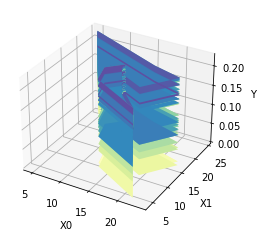

In [34]:
fig = plt.figure()
ax2 = plt.subplot(projection='3d')
ax2.plot_surface(X[:, 0], X[:, 1], probaMulti ,cmap='Spectral',linewidth=0)
ax2.set_xlabel('X0')
ax2.set_ylabel('X1')
ax2.set_zlabel('Y')
plt.show()

# Travail à faire
- 1) Nous aimerions bien choisir le epsilon, ceci est fait en analysant le score F1 obtenu precedenmment
- 2) nous aimerions appliquer une gaussienne multivariée à nos caracterisqtues; et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)
- 3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison. 
- 4) **** En Bonus - PAS obligatoire **** : nous aimerions utiliser la loi de Bayes afin de classifier nos exemples. Pour cela, voir le cours.


# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Lundi 23 Mai 2022 à 22h


In [ ]:
# bonne chance